# Install the required Packages

In [25]:
import pylab
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

pylab.rcParams.update({'font.size': 14})

%matplotlib inline

# Get the Raw data frame

In [26]:
df = pd.read_csv('AnomalyClean.csv')

In [27]:
df.head()


,Unnamed: 0,Interval,DynamicViscosityAvg,DynamicViscosityMin,DynamicViscosityMax,DielectricConstAvg,DielectricConstMin,DielectricConstMax,DensityAvg,DensityMin,DensityMax,TemperatureAvg,TemperatureMin,TemperatureMax
0,0,2021-11-01 06:00:00,128.41665,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
1,1,2021-11-01 10:00:00,128.41665,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
2,2,2021-11-01 14:00:00,128.41665,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
3,3,2021-11-01 18:00:00,128.41665,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836
4,4,2021-11-01 22:00:00,128.41665,16.709091,240.336364,118.060069,26.831818,219.045455,129.307523,15.863636,241.822727,44.014125,41.890411,63.643836


In [28]:
df.shape

(771, 14)

Covert Intervals into dateTime stamps

In [29]:
df['Interval'] = pd.to_datetime(df['Interval'])
df.dtypes

Unnamed: 0                      int64
Interval               datetime64[ns]
DynamicViscosityAvg           float64
DynamicViscosityMin           float64
DynamicViscosityMax           float64
DielectricConstAvg            float64
DielectricConstMin            float64
DielectricConstMax            float64
DensityAvg                    float64
DensityMin                    float64
DensityMax                    float64
TemperatureAvg                float64
TemperatureMin                float64
TemperatureMax                float64
dtype: object

# Temperature anomaly

In [30]:
df_Temp = df['TemperatureAvg']

In [31]:
 outliers=[]

def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [32]:
outlier_pt=detect_outliers(df_Temp)

In [33]:
outlier_pt

[54.15,
 48.88372093023256,
 39.0,
 38.333333333333336,
 57.34375,
 55.92857142857143,
 36.964285714285715,
 37.0,
 51.3448275862069,
 51.33333333333334,
 49.153846153846146,
 51.12903225806453,
 51.25806451612904,
 49.06666666666667,
 53.8,
 60.30769230769231,
 38.18181818181818,
 38.86666666666667,
 38.0,
 39.16666666666666,
 38.0,
 52.88,
 39.0]

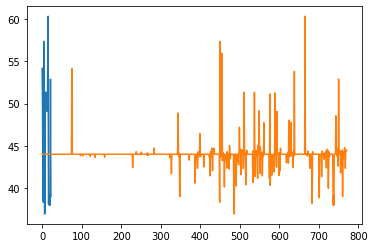

In [34]:

plt.plot(outlier_pt)
plt.plot(df_Temp)

# Viscosity Anomaly

In [35]:
df_Vis = df['DynamicViscosityAvg']

In [36]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [37]:
outlier_pt=detect_outliers(df_Vis)

In [38]:
outlier_pt


[192.5,
 170.75,
 56.0,
 80.66666666666667,
 169.53125,
 83.56,
 193.0,
 238.5,
 203.5,
 6.0,
 85.30555555555556,
 87.33333333333331,
 216.0,
 37.0,
 253.0,
 179.4]

# Density Anomaly

In [39]:
df_Dens = df['DensityAvg']

In [40]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [41]:
outlier_pt=detect_outliers(df_Dens)

In [42]:
outlier_pt

[71.0,
 86.5,
 184.0,
 15.0,
 92.83333333333331,
 85.5,
 224.0,
 84.53333333333333,
 171.5,
 243.0,
 70.25,
 236.0,
 83.83333333333333,
 190.0]

# Dielectric Constant Anomaly

In [43]:
df_Die = df['DielectricConstAvg']

In [44]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [45]:
outlier_pt=detect_outliers(df_Die)

In [46]:
outlier_pt

[196.1818181818182,
 191.38888888888889,
 202.5,
 199.5555555555556,
 54.0,
 50.90625,
 48.425,
 54.66666666666666,
 27.714285714285715,
 50.0,
 32.0,
 199.22857142857143,
 183.96774193548384,
 49.04878048780488,
 35.47826086956522,
 252.0,
 181.65306122448985,
 195.38636363636363,
 182.2142857142857,
 196.84375,
 201.5,
 186.78125,
 207.65217391304347]